## Exercicio

Implemente os modelos matemáticos dos distúrbios em um único algoritmo (afundamento, elevação, interrupção, transitório oscilatório, transitório impulsivo, flicker, distorção harmônica e notch). Varie aletoriamente os valores dos parâmetros de cada distúrbio, dentro dos limites típicos e crie um banco de dados contendo 150 amostras de cada distúrbio. Salve o banco de dados em um arquivo do formato 'csv'. Utilizar o artigo "Power quality disturbance classification based on compressed sensing and deep convolution neural networks", de autoria de J. Wang, Z. Xu, Y. Che, disponível no IEEE Access, para gerar o distúrbios (modelos + taxa de amostragem).


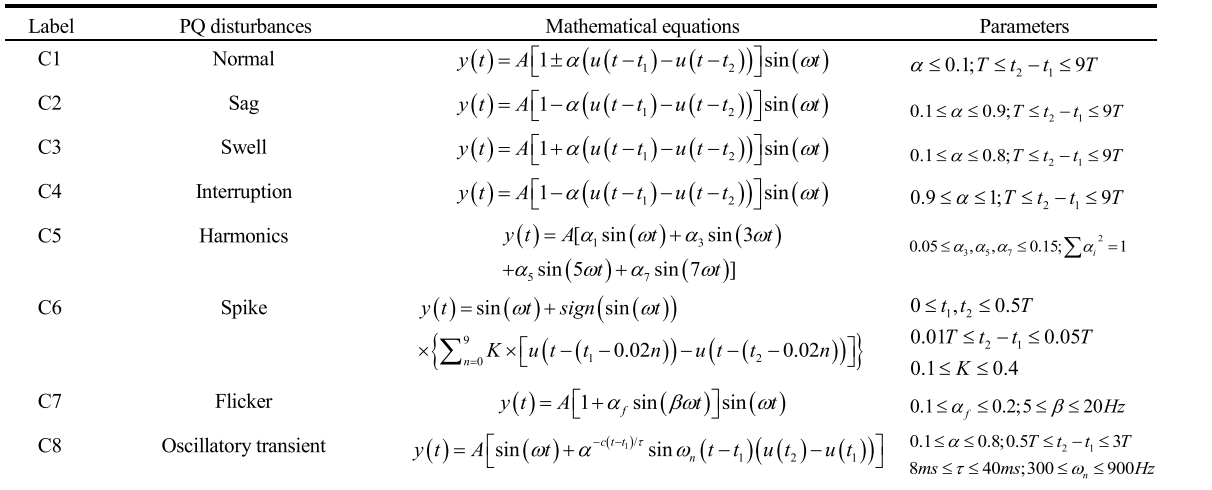

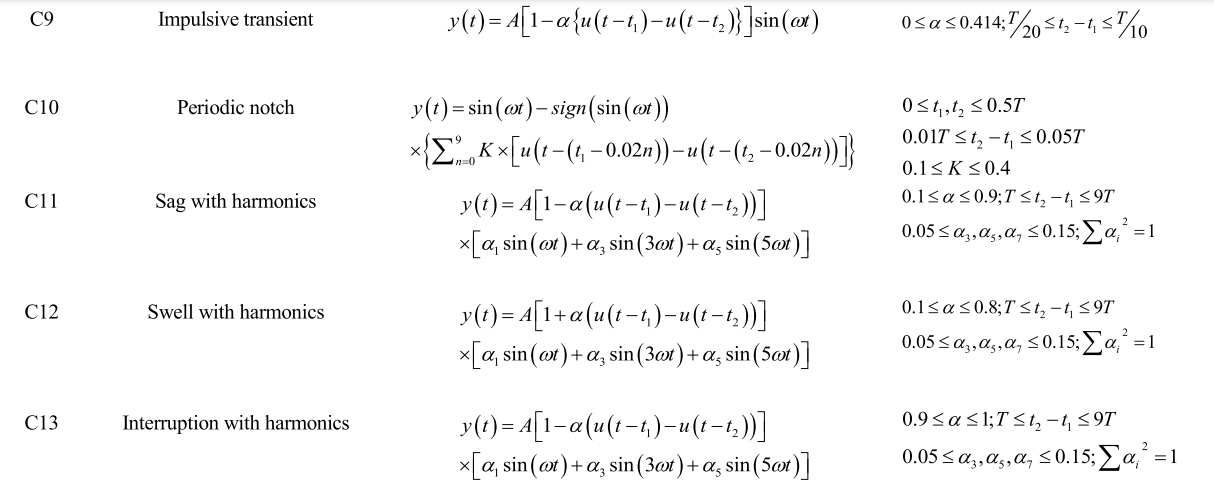

### Base de Dados

In [93]:
import numpy as np
import pandas as pd


parametros = np.zeros((150,10,9))
Resposta = np.zeros((150,2560,9))

###########################################################################

#(Afundamento)

#Alpha
parametros[:,0,0] = np.random.uniform(0.1,0.9,size=(1,150)) 

#T
parametros[:,2,0] = np.random.uniform((1/60)/2,1/60,size=(1,150))

#Duracao
parametros[:,3,0] = np.random.uniform(1/60,9/60,size=(1,150))

###########################################################################

#(Elevação)

#Alpha
parametros[:,0,1] = np.random.uniform(0.1,0.8,size=(1,150)) 

#T
parametros[:,2,1] = np.random.uniform((1/60)/2,1/60,size=(1,150))

#Duracao
parametros[:,3,1] = np.random.uniform(1/60,9/60,size=(1,150))

###########################################################################

#(Interrupção)

#Alpha
parametros[:,0,2] = np.random.uniform(0.9,1,size=(1,150)) 

#T
parametros[:,2,2] = np.random.uniform((1/60)/2,1/60,size=(1,150))

#Duracao
parametros[:,3,2] = np.random.uniform(1/60,9/60,size=(1,150))

###########################################################################

#(Transitorio Oscilatorio)

#Alpha
parametros[:,0,3] = np.random.uniform(0.1,0.8,size=(1,150)) 

#T
parametros[:,2,3] = np.random.uniform((1/60)/2,1/60,size=(1,150))

#Duracao
parametros[:,3,3] = np.random.uniform(0.5/(60),3/(60),size=(1,150))

#Tau
parametros[:,4,3] = np.random.uniform((8/1000),(40/1000),size=(1,150))

#Wn
parametros[:,5,3] = np.random.uniform(300,900,size=(1,150))

###########################################################################

#(Transitorio Impulsivo)

#Alpha
parametros[:,0,4] = np.random.uniform(0.5,5,size=(1,150)) 

#T
parametros[:,2,4] = np.random.uniform((1/60)/2,1/60,size=(1,150))

#Duracao
parametros[:,3,4] = np.random.uniform(1/(60*20),1/(60*10),size=(1,150))

###########################################################################

#(Flicker)

#Alpha
parametros[:,0,5] = np.random.uniform(0.1,0.2,size=(1,150)) 

#Beta
parametros[:,1,5] = np.random.uniform(5,20,size=(1,150))


###########################################################################

#(Flicker - AULA)

#Alpha
parametros[:,0,6] = np.random.uniform(0.5,0.8,size=(1,150)) 

#Beta
parametros[:,1,6] = np.random.uniform(40,60,size=(1,150))

#T
parametros[:,2,6] = np.random.uniform((1/60),(30/60),size=(1,150))

#Duracao
parametros[:,3,6] = np.random.uniform(1/(60),10/(60),size=(1,150))


###########################################################################

#(Notch)

#T
parametros[:,2,7] = np.random.uniform(0,(0.5/60),size=(1,150))

#Duracao
parametros[:,3,7] = np.random.uniform(0.05/(60),0.1/(60),size=(1,150))
            
#K
parametros[:,6,7] = np.random.uniform(0.4,1,size=(1,150))

###########################################################################

#(Harmonica)

#Lembrando que a soma dos alphas tem que ser =1 

#Alpha1              # 0.1 < a < 0.9
parametros[:,7,8] =  np.random.uniform(0.1,0.9,size=(1,150)) 

#Alpha2              # 1 - Alpha1 
parametros[:,8,8] =  np.random.uniform(0, 1 - parametros[:,7,0],size=(1,150)) 

#Alpha3              # 1 - Alpha2 - Alpha1
parametros[:,9,8] =  1 - parametros[:,8,0] - parametros[:,7,0]

#T
parametros[:,2,8] = np.random.uniform((1/60)/2,1/60,size=(1,150))

#Duracao
parametros[:,3,8] = np.random.uniform(1/60,9/60,size=(1,150))

###########################################################################


#Converção de 3D para 2D
parametros = np.reshape(parametros,(150*10, -1))

save = pd.DataFrame(parametros)
save.to_csv('C:\\Users\\carlo\\OneDrive\\Documentos\\GitHub\\Faculdade\\Jupyter\\Qualidade_De_Energia\\Exercicios\\parametros.csv')

#Conversão de 2D para 3D
parametros = np.reshape(parametros,(150,10,9))


## Sinal Fundamental

- Sinal senoidal

In [54]:
import matplotlib.pyplot as plt
import numpy as np

#Parametros Sinal
N_periodos = 10             # número de ciclos de sinal
Amostras_ciclo = 128        # quantidade de amostras por ciclo de sinal
freq = 60                   # frequência do sinal em Hz

t = np.linspace(0, N_periodos*(1/freq), N_periodos*Amostras_ciclo) #np.linspace(início, fim, número de pontos)

w=2.0*np.pi*freq # frequência angular
seno = np.sin(w*t)

## Disturbios 

### Afundamento de tensão

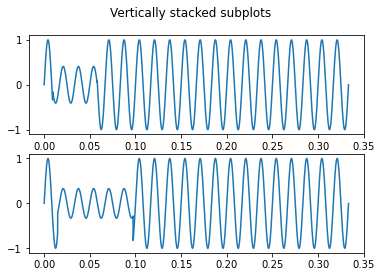

In [94]:
import matplotlib.pyplot as plt
import numpy as np

def u(x):
    a = lambda x: int(x>=0)
    b = list(map(a,x))
    return np.asarray(b)


# parâmetros do distúrbio
N_periodos = 20
Amostras_ciclo = 128 
freq = 60

# sinal fundamental
t = np.linspace(0, N_periodos*(1/freq), N_periodos*Amostras_ciclo)
w = 2.0*np.pi*freq
seno = np.sin(w*t)


Afundamento = np.zeros((len(parametros),N_periodos*Amostras_ciclo,1))

for i in range(len(parametros)):
    Afundamento[i,:,0] = (1-parametros[i,0,0]*(u(t-parametros[i,2,0])-u(t-(parametros[i,2,0]+parametros[i,3,0]))))*seno
    Resposta[i,:,0] = Afundamento[i,:,0]
    
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(t, Afundamento[0,:,0])
ax2.plot(t, Afundamento[1,:,0])   


### Elevação de tensão

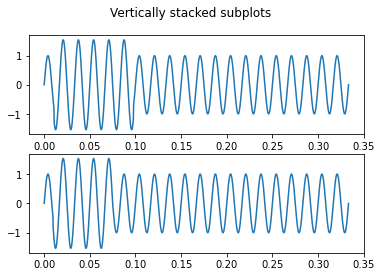

In [95]:
import matplotlib.pyplot as plt

def u(x):
    a = lambda x: int(x>=0)
    b = list(map(a,x))
    return np.asarray(b)


# parâmetros do distúrbio
N_periodos = 20
Amostras_ciclo = 128 
freq = 60

# sinal fundamental
t = np.linspace(0, N_periodos*(1/freq), N_periodos*Amostras_ciclo)
w = 2.0*np.pi*freq
seno = np.sin(w*t)


Elevação = np.zeros((len(parametros),N_periodos*Amostras_ciclo,1))

for i in range(len(parametros)):
    Elevação[i,:,0] = (1+parametros[i,0,1]*(u(t-parametros[i,2,1])-u(t-(parametros[i,2,1]+parametros[i,3,1]))))*seno
    Resposta[i,:,1] = Elevação[i,:,0]
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(t, Elevação[0,:,0])
ax2.plot(t, Elevação[1,:,0])   

### Interrupçao

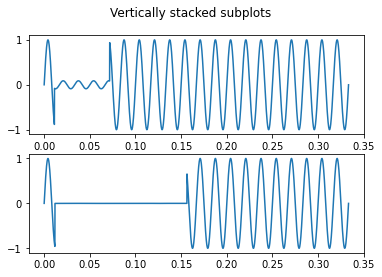

In [96]:
import matplotlib.pyplot as plt

def u(x):
    a = lambda x: int(x>=0)
    b = list(map(a,x))
    return np.asarray(b)


# parâmetros do distúrbio
N_periodos = 20
Amostras_ciclo = 128 
freq = 60

# sinal fundamental
t = np.linspace(0, N_periodos*(1/freq), N_periodos*Amostras_ciclo)
w = 2.0*np.pi*freq
seno = np.sin(w*t)


Interrupçao = np.zeros((len(parametros),N_periodos*Amostras_ciclo,1))

for i in range(len(parametros)):
    Interrupçao[i,:,0] = (1 - parametros[i,0,2]*(u(t-parametros[i,2,2])-u(t-(parametros[i,2,2]+parametros[i,3,2]))))*seno
    Resposta[i,:,2] = Interrupçao[i,:,0]
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(t, Interrupçao[0,:,0])
ax2.plot(t, Interrupçao[1,:,0])  

### Transitório Oscilatório

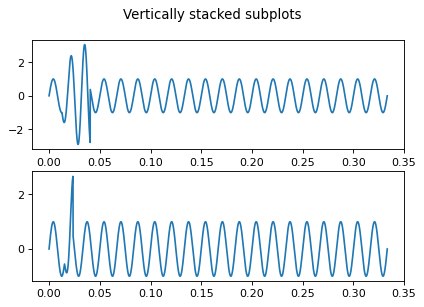

In [97]:
import matplotlib.pyplot as plt

def u(x):
    a = lambda x: int(x>=0)
    b = list(map(a,x))
    return np.asarray(b)

# parâmetros do distúrbio
N_periodos = 20
Amostras_ciclo = 128
freq = 60

# sinal fundamental
t = np.linspace(0, N_periodos*(1/freq), N_periodos*Amostras_ciclo)
w = 2.0*np.pi*freq
seno = np.sin(w*t)


Transitorio = np.zeros((len(parametros),N_periodos*Amostras_ciclo,1))

for i in range(len(parametros)):
    Transitorio[i,:,0] = seno + (parametros[i,0,3] ** (-1*(t-parametros[i,2,3])/parametros[i,4,3])) * np.sin((parametros[i,5,3])*(t-parametros[i,2,3])*(u(t-(parametros[i,2,3] + parametros[i,3,3]))- u(t-parametros[i,2,3])))
    Resposta[i,:,3] = Transitorio[i,:,0]
                      
fig, (ax1, ax2) = plt.subplots(2,dpi = 80)
fig.suptitle('Vertically stacked subplots')
ax1.plot(t, Transitorio[0,:,0])
ax2.plot(t, Transitorio[1,:,0])

### Transitório Impulsivo

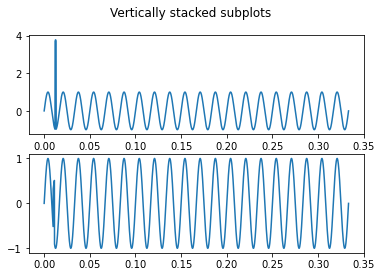

In [98]:
import matplotlib.pyplot as plt

def u(x):
    a = lambda x: int(x>=0)
    b = list(map(a,x))
    return np.asarray(b)


# parâmetros do distúrbio
N_periodos = 20
Amostras_ciclo = 128 
freq = 60

# sinal fundamental
t = np.linspace(0, N_periodos*(1/freq), N_periodos*Amostras_ciclo)
w = 2.0*np.pi*freq
seno = np.sin(w*t)


Impulsivo = np.zeros((len(parametros),N_periodos*Amostras_ciclo,1))

for i in range(len(parametros)):
    Impulsivo[i,:,0] = (1 - parametros[i,0,4]*(u(t-parametros[i,2,4])-u(t-(parametros[i,2,4]+parametros[i,3,4]))))*seno
    Resposta[i,:,4] = Impulsivo[i,:,0]
    
    
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(t, Impulsivo[0,:,0])
ax2.plot(t, Impulsivo[1,:,0])  

### Flicker (Esquisito)

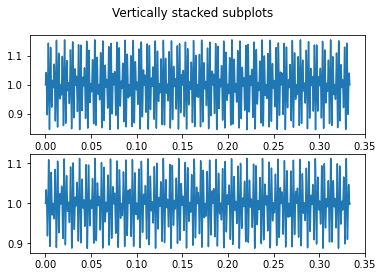

In [99]:
import matplotlib.pyplot as plt

def u(x):
    a = lambda x: int(x>=0)
    b = list(map(a,x))
    return np.asarray(b)

# parâmetros do distúrbio
N_periodos = 20
Amostras_ciclo = 128
freq = 60

# sinal fundamental
t = np.linspace(0, N_periodos*(1/freq), N_periodos*Amostras_ciclo)
w = 2.0*np.pi*freq
seno = np.sin(w*t)


Flicker = np.zeros((len(parametros),N_periodos*Amostras_ciclo,1))

for i in range(len(parametros)):
    Flicker[i,:,0] = (1 + (parametros[i,0,5]*(np.sin(w*t*parametros[i,1,5])))*seno)
     
    
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(t, Flicker[0,:,0])
ax2.plot(t, Flicker[1,:,0]) 

### Flicker (Aula)

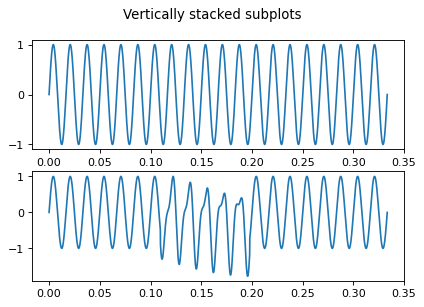

In [100]:
import matplotlib.pyplot as plt

def u(x):
    a = lambda x: int(x>=0)
    b = list(map(a,x))
    return np.asarray(b)

# parâmetros do distúrbio
N_periodos = 20
Amostras_ciclo = 128
freq = 60

# sinal fundamental
t = np.linspace(0, N_periodos*(1/freq), N_periodos*Amostras_ciclo)
w = 2.0*np.pi*freq
seno = np.sin(w*t)


FlickerA = np.zeros((len(parametros),N_periodos*Amostras_ciclo,1))

for i in range(len(parametros)):
    FlickerA[i,:,0] = (1+(parametros[i,0,6]*(u(t-parametros[i,2,6])-u(t-(parametros[i,2,6]+parametros[i,3,6])))*np.sin(2*np.pi*parametros[i,1,6]*t)))*seno
    Resposta[i,:,5] = FlickerA[i,:,0]  
    
fig, (ax1, ax2) = plt.subplots(2,dpi = 80)
fig.suptitle('Vertically stacked subplots')
ax1.plot(t, FlickerA[0,:,0])
ax2.plot(t, FlickerA[1,:,0])

### Notch

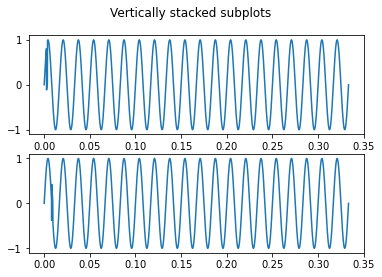

In [102]:
import matplotlib.pyplot as plt

def u(x):
    a = lambda x: int(x>=0)
    b = list(map(a,x))
    return np.asarray(b)

# parâmetros do distúrbio
N_periodos = 20
Amostras_ciclo = 128
freq = 60

# sinal fundamental
t = np.linspace(0, N_periodos*(1/freq), N_periodos*Amostras_ciclo)
w = 2.0*np.pi*freq
seno = np.sin(w*t)
soma = 0

Notch = np.zeros((len(parametros),N_periodos*Amostras_ciclo,1))

for i in range(len(parametros)):
    for j in range(10):
        soma = (parametros[i,6,7] * (u(t-(parametros[i,2,7] - (0.02*j))) - u(t-((parametros[i,2,7]+parametros[i,3,7])- (0.02*j))))) + soma
    Notch[i,:,0] = (seno - (np.sign(seno)*soma))
    Resposta[i,:,6] = Notch[i,:,0]  
    soma=0
    
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(t, Notch[0,:,0])
ax2.plot(t, Notch[1,:,0])

### Distorção Harmonica

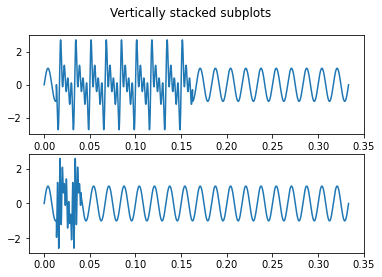

In [104]:
import matplotlib.pyplot as plt

def u(x):
    a = lambda x: int(x>=0)
    b = list(map(a,x))
    return np.asarray(b)

# parâmetros do distúrbio
N_periodos = 20
Amostras_ciclo = 128
freq = 60

# sinal fundamental
t = np.linspace(0, N_periodos*(1/freq), N_periodos*Amostras_ciclo)
w = 2.0*np.pi*freq
seno = np.sin(w*t)

# distúrbio 
a = np.array([0])
harmonics = seno
ordem = 2

Harmonica = np.zeros((len(parametros),N_periodos*Amostras_ciclo,1))

for i in range(len(parametros)):
    for j in range(7,10):
        a = (parametros[i,j,8]*np.sin(ordem*w*t))+a
        ordem = ordem+1
    a = a*(u(t-parametros[i,2,8])-u(t-(parametros[i,2,8]+parametros[i,3,8])))
    Harmonica[i,:,0] = harmonics+a
    Resposta[i,:,7] = Harmonica[i,:,0]  
    a = 0
    
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(t, Harmonica[0,:,0])
ax2.plot(t, Harmonica[1,:,0])

In [105]:
# Salvando os distúrbios gerados

#Converção de 3D para 2D
Resposta = np.reshape(Resposta,(150*2560, -1))

save = pd.DataFrame(Resposta)
save.to_csv('C:\\Users\\carlo\\OneDrive\\Documentos\\GitHub\\Faculdade\\Jupyter\\Qualidade_De_Energia\\Exercicios\\Disturbios.csv',header=None,index=None)